Reflected Spectrum:
[0.0015     0.003      0.0045     0.0075     0.015      0.045
 0.09       0.12       0.135      0.15       0.105      0.06
 0.045      0.0525     0.08444444 0.1225     0.16666667 0.21694444
 0.18222222 0.33583333 0.40444444 0.41527778 0.42       0.385
 0.35       0.315      0.28       0.245      0.21       0.175
 0.14       0.105      0.07       0.056      0.042      0.028
 0.014      0.007      0.007      0.007      0.007     ]
XYZ Values:
[3.08579106 2.57748178 1.01630808]
Normalized XYZ Values:
[0.46197375 0.38587477 0.15215147]
RGB Values:
[0.82804272 0.28253182 0.10783759]


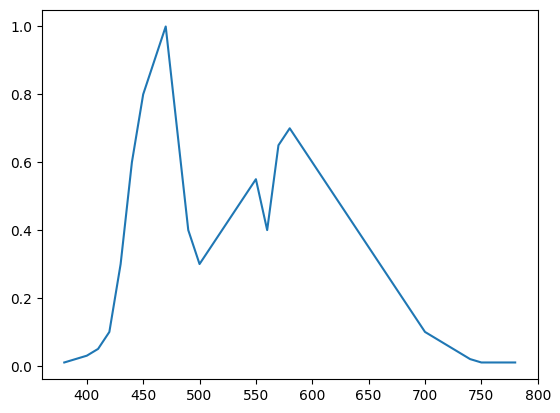

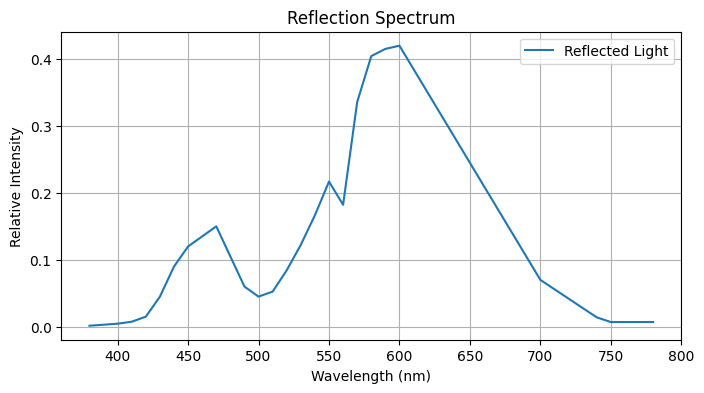

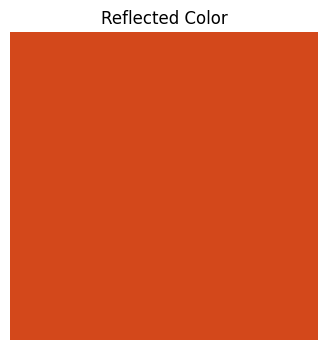

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 光の分光スペクトルのデータ（例として、可視光領域の波長範囲（380nm～780nm）を10nm間隔で設定）
wavelengths = np.arange(380, 781, 10)
# 最初と最後の値を設定
start_value = 1.0
end_value = 1.0

# 線形に増加する値を計算
light_spectrum = np.linspace(start_value, end_value, len(wavelengths))
light_spectrum = np.array([0.01, 0.02, 0.03, 0.05, 0.1, 0.3, 0.6, 0.8, 0.9, 1.0, 
                           0.7, 0.4, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.4, 0.65, 
                           0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 
                           0.2, 0.15, 0.1, 0.08, 0.06, 0.04, 0.02, 0.01, 0.01, 0.01, 0.01])

# 最初と最後の値を固定
# light_spectrum[0] = start_value
# light_spectrum[-1] = end_value
# 色の分光反射率（一定値を仮定）

# reflectance = 0.5# gray

# light_spectrum = 1.0

plt.plot(wavelengths, light_spectrum)

reflectance = 0.01# black



# 赤色の分光反射率を設定
red_reflectance = np.zeros_like(wavelengths, dtype=float)
red_reflectance[:(500 - 380) // 10 + 1] = 0.15
red_reflectance[(600 - 380) // 10:] = 0.7

# 550nmから600nmまでの範囲の値を生成し、red_reflectanceの適切な位置に代入
start_index = (500 - 380) // 10 + 1
end_index = (600 - 380) // 10
num_values = end_index - start_index + 1
red_reflectance[start_index:end_index + 1] = np.linspace(0.15, 0.7, num_values)


# 反射光のスペクトルを計算
reflected_spectrum = light_spectrum * red_reflectance




# 反射光のスペクトルを計算
# reflected_spectrum = light_spectrum * reflectance

# CIE 1931 等色関数のデータ
cie_color_match = np.array([
    [0.001368, 0.000039, 0.006450],
    [0.004243, 0.000120, 0.020050],
    [0.014310, 0.000396, 0.067850],
    [0.043510, 0.001210, 0.207400],
    [0.134380, 0.004000, 0.645600],
    [0.283900, 0.011600, 1.385600],
    [0.348280, 0.023000, 1.747060],
    [0.336200, 0.038000, 1.772110],
    [0.290800, 0.060000, 1.669200],
    [0.195360, 0.090980, 1.287640],
    [0.095640, 0.139020, 0.812950],
    [0.032010, 0.208020, 0.465180],
    [0.004900, 0.323000, 0.272000],
    [0.009300, 0.503000, 0.158200],
    [0.063270, 0.710000, 0.078250],
    [0.165500, 0.862000, 0.042160],
    [0.290400, 0.954000, 0.020300],
    [0.433450, 0.994950, 0.008750],
    [0.594500, 0.995000, 0.003900],
    [0.762100, 0.952000, 0.002100],
    [0.916300, 0.870000, 0.001650],
    [1.026300, 0.757000, 0.001100],
    [1.062200, 0.631000, 0.000800],
    [1.002600, 0.503000, 0.000340],
    [0.854450, 0.381000, 0.000190],
    [0.642400, 0.265000, 0.000050],
    [0.447900, 0.175000, 0.000020],
    [0.283500, 0.107000, 0.000000],
    [0.164900, 0.061000, 0.000000],
    [0.087400, 0.032000, 0.000000],
    [0.046770, 0.017000, 0.000000],
    [0.022700, 0.008210, 0.000000],
    [0.011359, 0.004102, 0.000000],
    [0.005790, 0.002091, 0.000000],
    [0.002899, 0.001047, 0.000000],
    [0.001440, 0.000520, 0.000000],
    [0.000690, 0.000249, 0.000000],
    [0.000332, 0.000120, 0.000000],
    [0.000166, 0.000060, 0.000000],
    [0.000083, 0.000030, 0.000000],
    [0.000042, 0.000015, 0.000000]
])

# 反射光のスペクトルと等色関数の積を計算し、XYZ値を求める
X = np.sum(reflected_spectrum * cie_color_match[:, 0])
Y = np.sum(reflected_spectrum * cie_color_match[:, 1])
Z = np.sum(reflected_spectrum * cie_color_match[:, 2])

# XYZ値を正規化
XYZ = np.array([X, Y, Z])
XYZ_normalized = XYZ / np.sum(XYZ)

# XYZ値をRGB値に変換
M = np.array([[3.2406, -1.5372, -0.4986],
              [-0.9689, 1.8758, 0.0415],
              [0.0557, -0.2040, 1.0570]])

RGB = np.dot(M, XYZ_normalized)

# RGB値を0～1の範囲に正規化
RGB_normalized = np.clip(RGB, 0, 1)

# 結果を表示
print("Reflected Spectrum:")
print(reflected_spectrum)
print("XYZ Values:")
print(XYZ)
print("Normalized XYZ Values:")
print(XYZ_normalized)
print("RGB Values:")
print(RGB_normalized)

# 反射光のスペクトルをプロット
plt.figure(figsize=(8, 4))
plt.plot(wavelengths, reflected_spectrum, label='Reflected Light')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Relative Intensity')
plt.title('Reflection Spectrum')
plt.legend()
plt.grid(True)
plt.show()

# 得られたRGB値を使って色を表示
plt.figure(figsize=(4, 4))
plt.imshow([[RGB_normalized]])
plt.axis('off')
plt.title('Reflected Color')
plt.show()

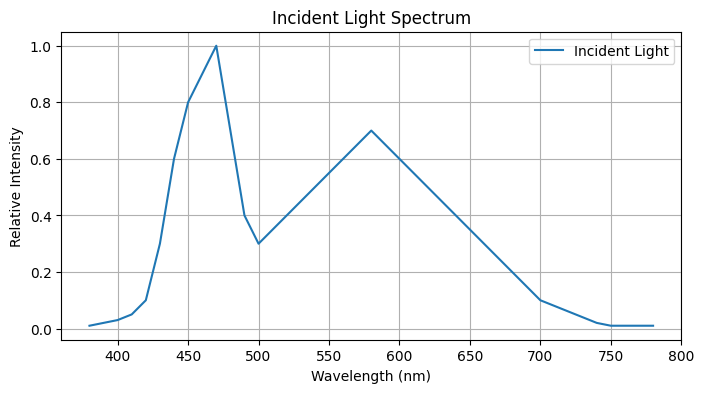

In [128]:
# 光の分光スペクトルをプロット
plt.figure(figsize=(8, 4))
plt.plot(wavelengths, light_spectrum, label='Incident Light')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Relative Intensity')
plt.title('Incident Light Spectrum')
plt.legend()
plt.grid(True)
plt.show()

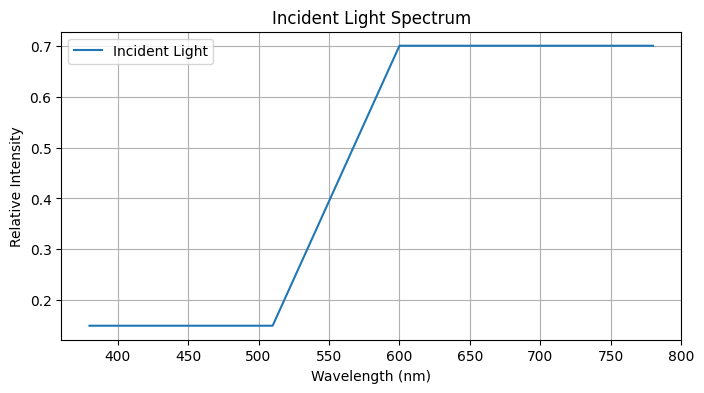

In [131]:
# 光の分光スペクトルをプロット
plt.figure(figsize=(8, 4))
plt.plot(wavelengths, red_reflectance, label='Incident Light')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Relative Intensity')
plt.title('Incident Light Spectrum')
plt.legend()
plt.grid(True)
plt.show()